<a href="https://colab.research.google.com/github/SivanandhamMani/ML--Industries-case-studies/blob/main/Height_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Necessary libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# 2. Import Data

In [ ]:
weight_height_data = pd.read_csv('weight-height.csv')
weight_height_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# 3. Data Understanding

In [ ]:
weight_height_data.shape

(10000, 3)

In [ ]:
weight_height_data.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
weight_height_data.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

# 4. Data Preparation

### Let's do Feature Engineering

It is nothing but a concept of whatever you do with Features, we call it as Feature Engineering.
- Feature Deletion
- Feature Addition
- Feature Selection
- Feature Decompostion
- Feature Transformation

### We are interested to convert units of Height from Inches to cm and Weight from pounds to Kg.

In [ ]:
weight_height_data_copied = weight_height_data.copy()

In [ ]:
del weight_height_data_copied['Gender']

In [ ]:
weight_height_data_copied['Height_cm'] = weight_height_data_copied['Height']*2.54
weight_height_data_copied['Weight_kg'] = weight_height_data_copied['Weight']/2.205

In [ ]:
weight_height_data_copied.drop(labels=['Height','Weight'],axis=1,inplace=True)

In [ ]:
weight_height_data_copied

,Height_cm,Weight_kg
0,187.571423,109.702296
1,174.706036,73.610192
2,188.239668,96.481114
3,182.196685,99.792504
4,177.499761,93.582676
...,...,...
9995,168.078536,62.030591
9996,170.350573,77.491114
9997,162.224700,58.265451
9998,175.346978,74.309506


## Let's Perform Assumptions Test

### Assumption 1: Normality Test

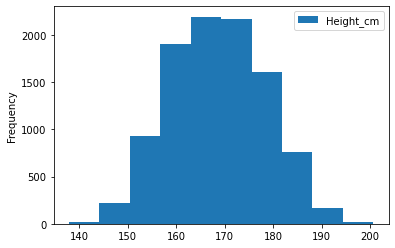

In [ ]:
weight_height_data_copied.plot(kind = 'hist',x = 'Weight_kg')
plt.show()

### Assumption 2: Linearity Test

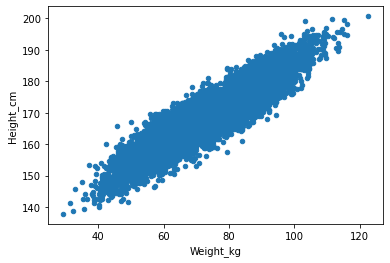

In [ ]:
weight_height_data_copied.plot(x = 'Weight_kg', y = 'Height_cm',kind = 'scatter' )
plt.show()

### Assumption 3: Multicollinearity

In [ ]:
weight_height_data_copied.corr()

,Height_cm,Weight_kg
Height_cm,1.000000,0.924756
Weight_kg,0.924756,1.000000


### Assumption 4: No Auto Regression

### Assumption 5: Homoscadasticity Test
### Assumption 6: Zero Residual Mean Test

**_Note: These 2 tests will be performed post model Training_**

# 5. Model Building

In [ ]:
X = weight_height_data_copied[['Weight_kg']]
y = weight_height_data_copied[['Height_cm']]

# 6. Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X,y)

LinearRegression()

In [ ]:
linear_model.coef_

array([[0.62062922]])

In [ ]:
linear_model.intercept_

array([123.13387264])

# 7. Model Testing

### Manual Testing

In [ ]:
#y = mx + c
#If Weight is 95kg, what will be the Height?
(0.62062922*95) + 123.13387264

182.09364854

In [ ]:
#If Weight is 75kg, what will be the Height?
(0.62062922*75) + 123.13387264

169.68106414

In [ ]:
#If Weight is 110kg, what will be the Height?
(0.62062922*110) + 123.13387264

191.40308684000001

### Automatic Prediction

In [ ]:
#X_test = pd.DataFrame(data = [95,75,110])
#X_test
y_pred = linear_model.predict(X)
y_pred

array([[191.21832319],
       [168.81850845],
       [183.01287094],
       ...,
       [159.29511386],
       [169.25252357],
       [155.12206037]])

# 8. Model Evaluation

In [ ]:
error = y - y_pred
error

,Height_cm
0,-3.646900
1,5.887528
2,5.226797
3,-2.871331
4,-3.714254
...,...
9995,6.446666
9996,-0.876549
9997,2.929586
9998,6.094454


In [ ]:
error.mean()

Height_cm   -1.561204e-14
dtype: float64

## Let's check Assumption 5: Homoscadasticity Test

**It is a plot between Input and the Error**

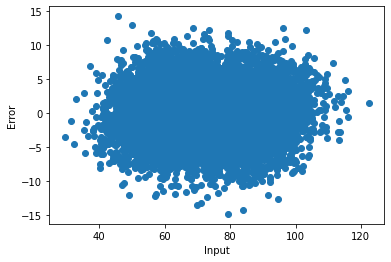

In [ ]:
plt.scatter(x = weight_height_data_copied['Weight_kg'],y = error)
plt.xlabel('Input')
plt.ylabel('Error')
plt.show()

### Assumption 6: Zero Residual Mean Test across the Fitted Line

**It is a plot between Actual Output and Predicted Output**

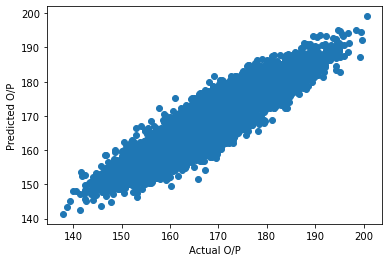

In [ ]:
plt.scatter(x = y,y = y_pred)
plt.xlabel('Actual O/P')
plt.ylabel('Predicted O/P')
plt.show()

# 9. Model Deployement

In [ ]:
from pickle import dump

In [ ]:
dump(linear_model,open('height_intelligence.pkl','wb')) #Write bytes

In [ ]:
from pickle import load

In [ ]:
loaded_intelligence = load(open('height_intelligence.pkl','rb'))

In [ ]:
loaded_intelligence.predict(X_test)

array([[182.09364855],
       [169.68106414],
       [191.40308685]])

# THE END!!